### Name: Priti Balkrushna Aware
### Roll No: 07
### Class: TE-B

### Assignment No: 10
### Text Analytics
1. Extract Sample document and apply following document preprocessing methods:
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.
2. Create representation of document by calculating Term Frequency and Inverse Document 
Frequency.

In [1]:
import nltk

In [9]:
# Tokonization

from nltk.tokenize import word_tokenize,sent_tokenize
text ="""Hi I am Priti Aware, how are you today? The weather is great and city is awsome."""

tokenized_words =word_tokenize(text)
tokenized_sent = sent_tokenize(text)

print("Tokonized Word: ")
print(tokenized_words)
print("Tokonized sentence: ")
print(tokenized_sent)

Tokonized Word: 
['Hi', 'I', 'am', 'Priti', 'Aware', ',', 'how', 'are', 'you', 'today', '?', 'The', 'weather', 'is', 'great', 'and', 'city', 'is', 'awsome', '.']
Tokonized sentence: 
['Hi I am Priti Aware, how are you today?', 'The weather is great and city is awsome.']


<FreqDist with 19 samples and 20 outcomes>


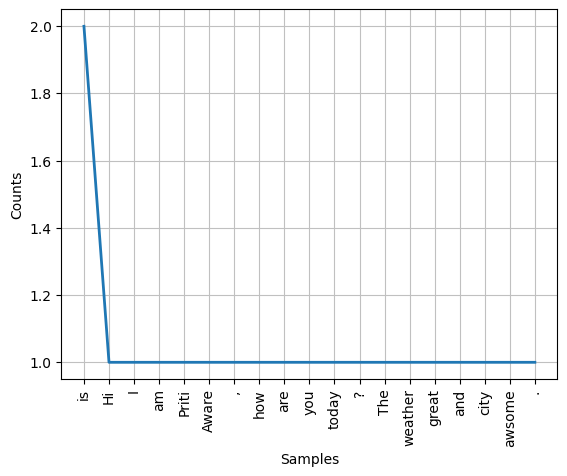

In [17]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
print(fdist)

fdist.most_common(2)

import matplotlib.pyplot as plt
fdist.plot(50)
plt.show()

In [19]:
# POS Tagging  find out the gramatical group of words like noun,pronouns,verb,adjectives
from nltk import pos_tag
pos_tags = pos_tag(tokenized_words)
print(pos_tags)

[('Hi', 'NNP'), ('I', 'PRP'), ('am', 'VBP'), ('Priti', 'NNP'), ('Aware', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('today', 'NN'), ('?', '.'), ('The', 'DT'), ('weather', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('and', 'CC'), ('city', 'NN'), ('is', 'VBZ'), ('awsome', 'JJ'), ('.', '.')]


In [23]:
# Stop word removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

filtered_sent=[]
for w in tokenized_words:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized sentence: ",tokenized_words)
print("Filtered sentence: ",filtered_sent)

{'mustn', 'her', 'about', 'not', 'any', 'off', 'them', 'me', 'should', "couldn't", 'wouldn', 'in', 'most', 'all', "hadn't", 'won', "wouldn't", 'then', 'this', 'for', 'mightn', "haven't", 'has', 'theirs', 'how', 'such', 've', 'd', "mustn't", 'you', "shan't", "you'd", 'be', 'with', 'm', "needn't", "you've", 'more', 'do', 'needn', 'who', 'him', 'she', "should've", 'above', 'against', 'have', 'am', 'what', "you're", 'other', 'are', 'before', 'isn', 'because', 'between', 'through', 'or', 'o', "don't", "shouldn't", 'himself', "doesn't", 'they', 'didn', 'whom', "won't", 'below', 'if', 'a', 'why', 'which', 'both', 'its', 'at', 'shan', 'his', 'it', 'few', 'out', 'did', "it's", 'doing', "weren't", 'into', 'their', 'was', 'during', 'some', 'haven', 'after', 'he', 'yourselves', 'over', 'now', 'had', 'i', 'we', 'itself', 'these', 'up', "aren't", 'does', 'from', 't', 'your', 'don', 'here', 'were', 'aren', 'having', 'as', 's', 'too', 'hasn', 'been', 'so', 'when', 'the', 'themselves', 'couldn', 'll', 

In [32]:
#Stemming is the process of reducing words to their root words
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stem_words = []
for w in filtered_sent:
     stem_words.append(ps.stem(w))
print("Filtered sentence: ",filtered_sent)
print("Stemmed sentence: ",stem_words)

Filtered sentence:  ['Hi', 'I', 'Priti', 'Aware', ',', 'today', '?', 'The', 'weather', 'great', 'city', 'awsome', '.']
Stemmed sentence:  ['hi', 'i', 'priti', 'awar', ',', 'today', '?', 'the', 'weather', 'great', 'citi', 'awsom', '.']


In [38]:
#Lemmatization is the process of reducing words to their base words which is grammatically correct
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

wnl =WordNetLemmatizer()
lem_words = []
for w in filtered_sent:
     lem_words.append(wnl.lemmatize(w))
print("Filtered sentence: ",filtered_sent)
print("Lemmatized sentence: ",lem_words)

Filtered sentence:  ['Hi', 'I', 'Priti', 'Aware', ',', 'today', '?', 'The', 'weather', 'great', 'city', 'awsome', '.']
Lemmatized sentence:  ['Hi', 'I', 'Priti', 'Aware', ',', 'today', '?', 'The', 'weather', 'great', 'city', 'awsome', '.']


In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Sample data
data = pd.DataFrame({
    'Document': [1],
    'Prase': ['I love dogs.']
})

# Create a single target label for the single sample
data['Sentiment'] = ['Positive']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
text_tf = tfidf_vectorizer.fit_transform(data['Prase'])

# Train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(text_tf, data['Sentiment'])

# Predict the labels for the test set
predicted = clf.predict(text_tf)

# Calculate accuracy
accuracy = metrics.accuracy_score(data['Sentiment'], predicted)
print("Accuracy:", accuracy)


Accuracy: 1.0
